In [3]:
import  tensorflow as tf
import  numpy as np
import matplotlib.pyplot as plt

In [4]:
sess=tf.Session()

In [15]:
x_vals=np.linspace(0,10,100)
y_vals=x_vals+np.random.normal(0,1,100)



In [6]:
x_vals_column=np.transpose(np.matrix(x_vals))

In [16]:
ones_column = np.transpose(np.matrix(np.repeat(1, 100))) #斜率 b

In [17]:
A=np.column_stack((x_vals_column,ones_column)) #连接两个矩阵

In [18]:
b=np.transpose(np.matrix(y_vals)) #y=x[1]A[1]+x[2]


In [33]:
A_tensor = tf.constant(A)
b_tensor = tf.constant(b)

tA_A = tf.matmul(tf.transpose(A_tensor), A_tensor)
L = tf.cholesky(tA_A)
print(sess.run(L))

[[57.88063882  0.        ]
 [ 8.6384672   5.03754746]]


In [20]:
tA_A_inv=tf.matrix_inverse(tf.matmul(tf.transpose(A_tensor),A_tensor))
product=tf.matmul(tA_A_inv,tf.transpose(A_tensor))
solution=tf.matmul(product,b_tensor)
solution_evel=sess.run(solution)
# AX=b，已知A，b，计算X，由于A可能不是一个满秩矩阵，所以X=（AT*A）-1 AT * b

In [21]:
solution

<tf.Tensor 'MatMul_2:0' shape=(2, 1) dtype=float64>

In [22]:
print(sess.run(solution))

[[ 0.98724754]
 [-0.00764499]]


In [25]:
slope=solution[0][0] #斜率
y_intercept=solution[1][0] #y轴截距
print('slope: ' + str(slope))
print('y_intercept: ' + str(y_intercept))


slope: Tensor("strided_slice_9:0", shape=(), dtype=float64)
y_intercept: Tensor("strided_slice_11:0", shape=(), dtype=float64)


ValueError: x and y must have same first dimension, but have shapes (100,) and (1, 100)

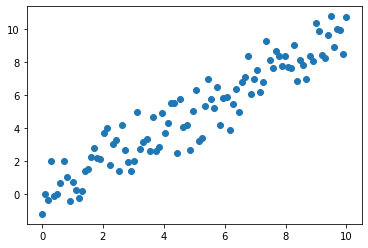

In [30]:
bestfit=[]
for i in x_vals:
    bestfit.append(slope*i+y_intercept)
plt.plot(x_vals,y_vals,'o',label='data')
plt.plot(x_vals, np.matrix(bestfit),'r-', label='Best fit line')
plt.legend(loc='upper left')
plt.show()